In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats

# Set style for plots
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import zscore

# Set style for plots
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'



Unit Step Market Breadth Analysis Results:
--------------------------------------------------
1. McClellan Oscillator: -1
2. McClellan Volume Oscillator: -1
3. New High-Low (Year): -1
4. New High-Low (Quarter): -1
5. New High-Low (Month): -1
6. Advance/Decline Volume Ratio: -1
7. MACD Positive-Negative: -1
8. MACD Signal Positive-Negative: -1
9. RSI Positive-Negative: -1
10. EMA Golden Cross: -1
11. Stochastic Oscillator Trend: -1
12. Volume Price Trend (VPT): -1
13. Price Rate of Change (ROC): -1
14. On-Balance Volume (OBV): -1
15. ATR Trend: 1
--------------------------------------------------
Total Market Breadth Score: -13
Market Breadth Percentage: 6.67%

Results have been saved to: set_market_breadth_results_20062025_022308.csv

Visualization graphs have been saved as PNG files.


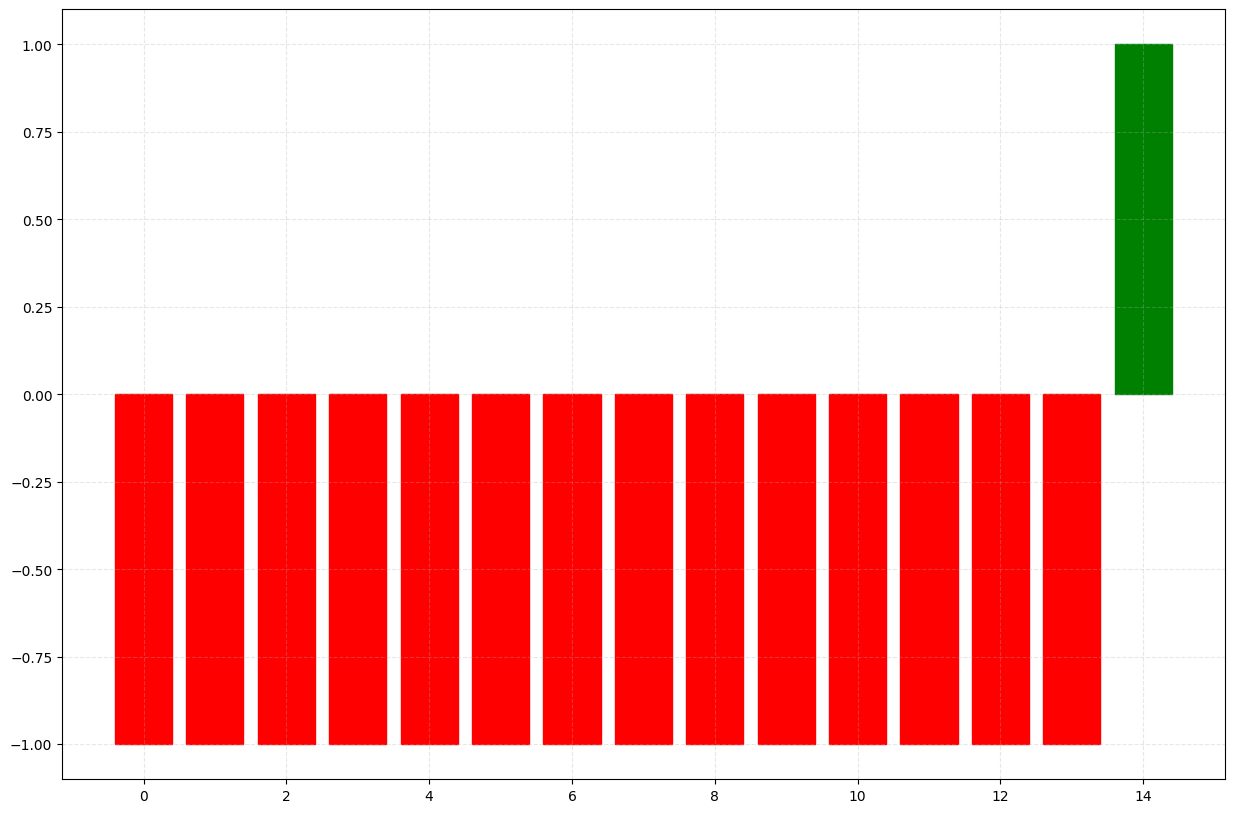

<Figure size 1500x800 with 0 Axes>

In [4]:
import yfinance as yf  # สำหรับดึงข้อมูลหุ้นจาก Yahoo Finance
import pandas as pd    # สำหรับจัดการข้อมูลในรูปแบบตาราง
import numpy as np     # สำหรับการคำนวณทางคณิตศาสตร์
from datetime import datetime, timedelta  # สำหรับจัดการเรื่องวันที่และเวลา
import matplotlib.pyplot as plt  # สำหรับสร้างกราฟ

def calculate_ema(data, period):
    """
    คำนวณค่าเฉลี่ยเคลื่อนที่แบบถ่วงน้ำหนักแบบเลขชี้กำลัง (Exponential Moving Average)
    
    Parameters:
    data (pandas.Series): ข้อมูลราคาที่ต้องการคำนวณ EMA
    period (int): จำนวนวันที่ใช้ในการคำนวณ EMA
    
    Returns:
    pandas.Series: ค่า EMA ที่คำนวณได้
    """
    return data.ewm(span=period, adjust=False).mean()

def get_unit_step(value):
    """
    แปลงค่าเป็น 1, -1 หรือ 0 ตามเงื่อนไข เพื่อใช้ในการคำนวณ Market Breadth
    
    Parameters:
    value (float): ค่าที่ต้องการแปลง
    
    Returns:
    int: 1 ถ้าค่าเป็นบวก, -1 ถ้าค่าเป็นลบ, 0 ถ้าค่าเป็นศูนย์
    """
    if value > 0:
        return 1
    elif value < 0:
        return -1
    return 0

class MarketBreadthAnalyzer:
    """
    คลาสสำหรับวิเคราะห์ Market Breadth ของหุ้นในกลุ่ม SET100
    ใช้การวิเคราะห์ทางเทคนิคหลากหลายรูปแบบเพื่อประเมินสภาวะตลาดโดยรวม
    """
    
    def __init__(self):
        """
        เริ่มต้นการทำงานของคลาส MarketBreadthAnalyzer
        กำหนดค่าเริ่มต้นสำหรับรายชื่อหุ้น SET100 และพื้นที่เก็บข้อมูล
        """
        self.set100_symbols = self.get_set100_symbols()  # รายชื่อหุ้น SET100
        self.data = {}  # dictionary สำหรับเก็บข้อมูลราคาของแต่ละหุ้น
        
    def get_set100_symbols(self):
        # รายชื่อหุ้นใน SET 100
        # Format: {symbol}.BK for Thai stocks
        return [f"{symbol}.BK" for symbol in [
    'AAV', 'ADVANC', 'AEONTS', 'AMATA', 'AOT', 'AP', 'AWC', 'BA', 'BAM', 'BANPU',
    'BBL', 'BCH', 'BCP', 'BCPG', 'BDMS', 'BEM', 'BGRIM', 'BH', 'BJC', 'BLA',
    'BTG', 'BTS', 'CBG', 'CCET', 'CENTEL', 'CHG', 'CK', 'CKP', 'COCOCO', 'COM7',
    'CPALL', 'CPF', 'CPN', 'CRC', 'DELTA', 'DOHOME', 'EA', 'EGCO', 'ERW', 'GLOBAL',
    'GPSC', 'GULF', 'GUNKUL', 'HANA', 'HMPRO', 'ICHI', 'IRPC', 'ITC', 'IVL', 'JAS',
    'JMART', 'JMT', 'KBANK', 'KCE', 'KKP', 'KTB', 'KTC', 'LH', 'M', 'MEGA',
    'MINT', 'MOSHI', 'MTC', 'OR', 'OSP', 'PLANB', 'PR9', 'PRM', 'PTT', 'PTTEP',
    'PTTGC', 'QH', 'RATCH', 'RCL', 'ROJNA', 'SAPPE', 'SAWAD', 'SCB', 'SCC', 'SCGP',
    'SIRI', 'SISB', 'SJWD', 'SKY', 'SNNP', 'SPALI', 'SPRC', 'STA', 'STGT', 'TASCO',
    'TCAP', 'TIDLOR', 'TISCO', 'TLI', 'TOP', 'TRUE', 'TTB', 'TU', 'VGI', 'WHA']] # รายชื่อหุ้นทั้งหมด 100 ตัว
    
    def fetch_data(self, period="2y"):
        """
        ดึงข้อมูลราคาหุ้นจาก Yahoo Finance สำหรับทุกหุ้นใน SET100
        
        Parameters:
        period (str): ช่วงเวลาที่ต้องการดึงข้อมูล (default: "1y" คือ 1 ปี)
                     สามารถระบุเป็น "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max"
        
        Notes:
        - ข้อมูลที่ดึงมาจะถูกเก็บใน self.data
        - หากมีข้อผิดพลาดในการดึงข้อมูล จะแสดงข้อความแจ้งเตือน
        """
        for symbol in self.set100_symbols:
            try:
                stock = yf.Ticker(symbol)
                self.data[symbol] = stock.history(period=period)
            except Exception as e:
                print(f"Error fetching data for {symbol}: {e}")
                
    def calculate_mcclellan_oscillator(self):
        """
        คำนวณค่า McClellan Oscillator จากข้อมูลราคาหุ้น
        
        Returns:
        int: 1 ถ้าแนวโน้มเป็นขาขึ้น, -1 ถ้าแนวโน้มเป็นขาลง, 0 ถ้าไม่มีแนวโน้มชัดเจน
        """
        ana_list = []  # สร้างลิสต์เปล่าเพื่อเก็บค่า ANA (Advance-Decline Net Average) ของแต่ละหุ้น
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    # คำนวณว่าราคาปิดวันนี้สูงกว่าเมื่อวาน (advance) หรือต่ำกว่า (decline)
                    advance = (df['Close'] > df['Close'].shift(1)).astype(int)  # แปลงเป็น 1 ถ้าราคาขึ้น
                    decline = (df['Close'] < df['Close'].shift(1)).astype(int)  # แปลงเป็น 1 ถ้าราคาลง
                    
                    # คำนวณ ANA = (advance - decline) / (advance + decline)
                    # เพิ่ม 1e-6 เพื่อป้องกันการหารด้วย 0
                    ana = (advance - decline) / (advance + decline + 1e-6)
                    ana_list.append(ana)

        if not ana_list:
            return 0

        # รวมค่า ANA ของทุกหุ้นและหาค่าเฉลี่ย
        ana_df = pd.concat(ana_list, axis=1).mean(axis=1)
    
        # คำนวณ EMA 19 วันและ 39 วัน
        ema19 = ana_df.ewm(span=19, adjust=False).mean()
        ema39 = ana_df.ewm(span=39, adjust=False).mean()
        
        # McClellan Oscillator = EMA19 - EMA39
        mcclellan = ema19 - ema39

        # แปลงผลลัพธ์เป็น 1, 0, หรือ -1
        return get_unit_step(mcclellan.iloc[-1])

    def calculate_mcclellan_volume_oscillator(self):
        """
        คำนวณค่า McClellan Volume Oscillator จากข้อมูลปริมาณการซื้อขาย
        
        Returns:
        int: 1 ถ้าแนวโน้มเป็นขาขึ้น, -1 ถ้าแนวโน้มเป็นขาลง, 0 ถ้าไม่มีแนวโน้มชัดเจน
        """
        anva_list = []  # สร้างลิสต์เปล่าเพื่อเก็บค่า ANVA (Advance-Decline Net Volume Average)
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    # แยก volume เป็น 2 ส่วนตามทิศทางราคา
                    up_vol = df['Volume'].where(df['Close'] > df['Close'].shift(1), 0)   # volume เมื่อราคาขึ้น
                    down_vol = df['Volume'].where(df['Close'] < df['Close'].shift(1), 0) # volume เมื่อราคาลง
                    
                    # คำนวณ ANVA = (up_volume - down_volume) / (up_volume + down_volume)
                    anva = (up_vol - down_vol) / (up_vol + down_vol + 1e-6)
                    anva_list.append(anva)

        if not anva_list:
            return 0

        # รวมค่า ANVA ของทุกหุ้นและหาค่าเฉลี่ย
        anva_df = pd.concat(anva_list, axis=1).mean(axis=1)
        
        # คำนวณ EMA 19 วันและ 39 วัน
        ema19 = anva_df.ewm(span=19, adjust=False).mean()
        ema39 = anva_df.ewm(span=39, adjust=False).mean()
        
        # McClellan Volume Oscillator = EMA19 - EMA39
        mcclellan_volume = ema19 - ema39

        # แปลงผลลัพธ์เป็น 1, 0, หรือ -1
        return get_unit_step(mcclellan_volume.iloc[-1])
    
    def calculate_new_highs_lows(self, period_days):
        """
        เปรียบเทียบจำนวนหุ้นที่ทำจุดสูงสุดใหม่กับจุดต่ำสุดใหม่
        
        Parameters:
        period_days (int): จำนวนวันย้อนหลังที่ใช้ในการคำนวณ
                          - 260 วัน สำหรับรายปี
                          - 65 วัน สำหรับรายไตรมาส
                          - 20 วัน สำหรับรายเดือน
        
        Returns:
        int: 1 ถ้ามีหุ้นทำจุดสูงสุดใหม่มากกว่า, -1 ถ้ามีหุ้นทำจุดต่ำสุดใหม่มากกว่า, 0 ถ้าเท่ากัน
        """
        new_highs = new_lows = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > period_days:
                    current_price = df['Close'].iloc[-1]
                    period_high = df['High'].iloc[-period_days:].max()
                    period_low = df['Low'].iloc[-period_days:].min()
                    
                    if current_price >= period_high:
                        new_highs += 1
                    if current_price <= period_low:
                        new_lows += 1
        
        return get_unit_step(new_highs - new_lows)
    
    def calculate_advance_decline_volume_ratio(self):
        # วัดความสัมพันธ์ระหว่างปริมาณการซื้อขายของหุ้นที่ขึ้นกับลง
        advance_volume = decline_volume = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    if df['Close'].iloc[-1] > df['Close'].iloc[-2]:
                        advance_volume += df['Volume'].iloc[-1]
                    else:
                        decline_volume += df['Volume'].iloc[-1]
        
        ratio = advance_volume / (advance_volume + decline_volume + 1)
        return 1 if ratio >= 0.5 else -1
    
    def calculate_macd_indicators(self):
        # วิเคราะห์แนวโน้มโดยใช้ MACD (Moving Average Convergence Divergence)
        # ดูทั้งค่า MACD และสัญญาณ MACD
        macd_positive = macd_negative = 0
        macd_sig_positive = macd_sig_negative = 0
        
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 26:
                    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
                    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
                    macd = exp12 - exp26
                    signal = macd.ewm(span=9, adjust=False).mean()
                    
                    if macd.iloc[-1] > 0:
                        macd_positive += 1
                    else:
                        macd_negative += 1
                        
                    if macd.iloc[-1] > signal.iloc[-1]:
                        macd_sig_positive += 1
                    else:
                        macd_sig_negative += 1
        
        macd_step = get_unit_step(macd_positive - macd_negative)
        macd_sig_step = get_unit_step(macd_sig_positive - macd_sig_negative)
        return macd_step, macd_sig_step
    
    def calculate_rsi_indicator(self):
        rsi_positive = rsi_negative = 0
        # วัดความแข็งแกร่งของแนวโน้มโดยใช้ RSI (Relative Strength Index)
        
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 14:
                    delta = df['Close'].diff()
                    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
                    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
                    rs = gain / loss
                    rsi = 100 - (100 / (1 + rs))
                    
                    if rsi.iloc[-1] > 50:
                        rsi_positive += 1
                    else:
                        rsi_negative += 1
        
        return get_unit_step(rsi_positive - rsi_negative)
    
    def calculate_ema_golden_cross(self):
        # ตรวจจับการตัดกันของค่าเฉลี่ยเคลื่อนที่ (Golden Cross)
        ema_positive = ema_negative = 0
        
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 89:
                    ema89 = df['Close'].ewm(span=89, adjust=False).mean()
                    if df['Close'].iloc[-1] > ema89.iloc[-1]:
                        ema_positive += 1
                    else:
                        ema_negative += 1
        
        return get_unit_step(ema_positive - ema_negative)
    
    def calculate_stochastic_trend(self):
        # วัดโมเมนตัมของราคาโดยใช้ Stochastic Oscillator
        stoch_up = stoch_down = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 14:
                    high_14 = df['High'].rolling(window=14).max()
                    low_14 = df['Low'].rolling(window=14).min()
                    k = 100 * (df['Close'] - low_14) / (high_14 - low_14)
                    d = k.rolling(window=3).mean()
                    
                    if k.iloc[-1] > d.iloc[-1]:  # Bullish crossover
                        stoch_up += 1
                    else:
                        stoch_down += 1
        return get_unit_step(stoch_up - stoch_down)

    def calculate_vpt_trend(self):
        # วิเคราะห์ความสัมพันธ์ระหว่างปริมาณการซื้อขายและราคา
        vpt_positive = vpt_negative = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 1:
                    price_change = df['Close'].pct_change()
                    vpt = (df['Volume'] * price_change).cumsum()
                    vpt_sma = vpt.rolling(window=20).mean()
                    
                    if vpt.iloc[-1] > vpt_sma.iloc[-1]:
                        vpt_positive += 1
                    else:
                        vpt_negative += 1
        return get_unit_step(vpt_positive - vpt_negative)

    def calculate_roc_trend(self):
        # วัดอัตราการเปลี่ยนแปลงของราคา
        roc_positive = roc_negative = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 10:
                    roc = ((df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10)) * 100
                    if roc.iloc[-1] > 0:
                        roc_positive += 1
                    else:
                        roc_negative += 1
        return get_unit_step(roc_positive - roc_negative)

    def calculate_obv_trend(self):
        # วิเคราะห์ความสัมพันธ์ระหว่างปริมาณการซื้อขายและทิศทางราคา
        obv_positive = obv_negative = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 20:
                    obv = (df['Volume'] * (~df['Close'].diff().le(0) * 2 - 1)).cumsum()
                    obv_sma = obv.rolling(window=20).mean()
                    
                    if obv.iloc[-1] > obv_sma.iloc[-1]:
                        obv_positive += 1
                    else:
                        obv_negative += 1
        return get_unit_step(obv_positive - obv_negative)

    def calculate_atr_trend(self):
        # วัดความผันผวนของตลาด
        atr_expanding = atr_contracting = 0
        for symbol in self.set100_symbols:
            if symbol in self.data:
                df = self.data[symbol]
                if len(df) > 14:
                    high_low = df['High'] - df['Low']
                    high_close = abs(df['High'] - df['Close'].shift())
                    low_close = abs(df['Low'] - df['Close'].shift())
                    ranges = pd.concat([high_low, high_close, low_close], axis=1)
                    true_range = ranges.max(axis=1)
                    atr = true_range.rolling(window=14).mean()
                    
                    # Compare current ATR with previous period
                    if atr.iloc[-1] > atr.iloc[-2]:
                        atr_expanding += 1
                    else:
                        atr_contracting += 1
        return get_unit_step(atr_expanding - atr_contracting)

    def calculate_total_score(self):
        """
        คำนวณคะแนนรวมของ Market Breadth จากทุกตัวชี้วัด
        
        Returns:
        tuple: (total_score, scores)
            - total_score (int): คะแนนรวมของ Market Breadth (-15 ถึง +15)
            - scores (list): รายการคะแนนของแต่ละตัวชี้วัด (แต่ละตัวมีค่า -1, 0, หรือ 1)
        
        Notes:
        - ดึงข้อมูลล่าสุดจาก Yahoo Finance ก่อนคำนวณ
        - รวมตัวชี้วัดทั้งหมด 15 ตัว
        - คะแนนบวกแสดงถึงแนวโน้มขาขึ้น คะแนนลบแสดงถึงแนวโน้มขาลง
        """
        self.fetch_data()
        
        scores = []
        scores.append(self.calculate_mcclellan_oscillator())  # 1
        scores.append(self.calculate_mcclellan_volume_oscillator())  # 2
        scores.append(self.calculate_new_highs_lows(260))  # 3
        scores.append(self.calculate_new_highs_lows(65))  # 4
        scores.append(self.calculate_new_highs_lows(20))  # 5
        scores.append(self.calculate_advance_decline_volume_ratio())  # 6
        
        macd_step, macd_sig_step = self.calculate_macd_indicators()
        scores.append(macd_step)  # 7
        scores.append(macd_sig_step)  # 8
        
        scores.append(self.calculate_rsi_indicator())  # 9
        scores.append(self.calculate_ema_golden_cross())  # 10
        
        scores.append(self.calculate_stochastic_trend())  # 11
        scores.append(self.calculate_vpt_trend())  # 12
        scores.append(self.calculate_roc_trend())  # 13
        scores.append(self.calculate_obv_trend())  # 14
        scores.append(self.calculate_atr_trend())  # 15
        
        total_score = sum(scores)
        return total_score, scores

def create_visualization(results_df):
    """
    สร้างกราฟแสดงผลการวิเคราะห์ Market Breadth
    
    Parameters:
    results_df (pd.DataFrame): DataFrame ที่มีผลการวิเคราะห์
    """
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    
    # 1. กราฟแท่งแสดงคะแนนแต่ละตัวชี้วัด
    plot_data = results_df[:-2].copy()
    plt.figure(figsize=(15, 10))  # เพิ่มความสูงเพื่อให้มีพื้นที่สำหรับคำอธิบาย
    
    # สร้างแท่งกราฟ
    bars = plt.bar(range(len(plot_data)), plot_data['Score'])
    
    # กำหนดสีแท่งกราฟ
    for i, bar in enumerate(bars):
        if plot_data['Score'].iloc[i] > 0:
            bar.set_color('green')
        elif plot_data['Score'].iloc[i] < 0:
            bar.set_color('red')
        else:
            bar.set_color('gray')
    
    # Create figure with more space at bottom for interpretation
    plt.figure(figsize=(15, 14))  # Increased height further to accommodate interpretation text
    
    # Create main subplot for the bar chart - use less vertical space for chart
    ax = plt.subplot2grid((7, 1), (0, 0), rowspan=5)  # Use 5/7 of vertical space for chart
    
    # Plot bars
    bars = ax.bar(range(len(plot_data)), plot_data['Score'])
    
    # Color the bars
    for i, bar in enumerate(bars):
        if plot_data['Score'].iloc[i] > 0:
            bar.set_color('green')
        elif plot_data['Score'].iloc[i] < 0:
            bar.set_color('red')
        else:
            bar.set_color('gray')
    
    # Customize the bar chart
    ax.set_title('Individual Market Breadth Indicators', fontsize=14, pad=20)
    ax.set_xlabel('Indicators', fontsize=12)
    ax.set_ylabel('Score (-1 to 1)', fontsize=12)
    ax.set_xticks(range(len(plot_data)))
    ax.set_xticklabels(plot_data['Indicator'], rotation=45, ha='right')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on bars
    for i, v in enumerate(plot_data['Score']):
        ax.text(i, v, str(v), ha='center', va='bottom' if v >= 0 else 'top')
    
    # Add interpretation text in the bottom subplot - use more space for text
    interpretation_ax = plt.subplot2grid((7, 1), (5, 0), rowspan=2)  # Use 2/7 of vertical space for text
    interpretation_ax.axis('off')  # Hide axes
    interpretation = """Interpretation:
• Green bars (1): Bullish signal/Upward trend
• Red bars (-1): Bearish signal/Downward trend
• Gray bars (0): Neutral signal/No clear trend"""
    interpretation_ax.text(0.1, 0.5, interpretation, 
                         fontsize=12,  # Increased font size
                         family='DejaVu Sans',
                         va='center',
                         multialignment='left',
                         linespacing=2)  # Increased line spacing
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)  # Increased space between chart and interpretation
    plt.savefig(f'market_breadth_indicators_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Pie chart showing distribution
    plt.figure(figsize=(10, 10))
    positive = len(plot_data[plot_data['Score'] > 0])
    negative = len(plot_data[plot_data['Score'] < 0])
    neutral = len(plot_data[plot_data['Score'] == 0])
    
    plt.pie([positive, negative, neutral], 
           labels=['Positive', 'Negative', 'Neutral'],
           colors=['green', 'red', 'gray'],
           autopct='%1.1f%%',
           startangle=90)
    
    plt.title('Distribution of Market Breadth Indicators', pad=20)
    
    # Add interpretation
    interpretation = f"""
    Interpretation:
    • High Green (Positive) ratio = Bullish market trend
    • High Red (Negative) ratio = Bearish market trend
    • High Gray (Neutral) ratio = Sideways market
    
    Summary: {
        'Strong Bullish Market Trend' if positive > max(negative, neutral) and positive > len(plot_data)/2 else
        'Strong Bearish Market Trend' if negative > max(positive, neutral) and negative > len(plot_data)/2 else
        'Sideways Market - No Clear Trend'
    }
    """
    plt.figtext(0.1, 0.02, interpretation, fontsize=10, ha='left', family='DejaVu Sans')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)
    plt.savefig(f'market_breadth_distribution_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Summary graphs showing total score and percentage
    plt.figure(figsize=(15, 8))
    
    # Create 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
    
    # Total score bar graph
    total_score = results_df.iloc[-2]['Score']
    bar = ax1.bar(['Total Score'], [total_score], color='blue' if total_score >= 0 else 'red')
    ax1.set_title('Total Market Breadth Score', pad=20)
    ax1.set_ylim(min(-15, total_score - 1), max(15, total_score + 1))
    ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax1.text(0, total_score, f'{total_score}', ha='center', va='bottom' if total_score >= 0 else 'top')
    
    # Percentage bar graph
    percentage = results_df.iloc[-1]['Score']
    bar = ax2.bar(['Market Breadth %'], [percentage], color='blue')
    ax2.set_title('Market Breadth Percentage', pad=20)
    ax2.set_ylim(0, 100)
    ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax2.text(0, percentage, f'{percentage:.1f}%', ha='center', va='bottom')
    
    # Add interpretation
    interpretation = f"""
    Interpretation:
    • Total Score (-15 to +15): {
        'Very Bullish Market' if total_score >= 10 else
        'Bullish Market' if total_score >= 5 else
        'Slightly Bullish Market' if total_score > 0 else
        'Neutral Market' if total_score == 0 else
        'Slightly Bearish Market' if total_score > -5 else
        'Bearish Market' if total_score > -10 else
        'Very Bearish Market'
    }
    
    • Market Breadth % (0-100%): {
        'Market is Overbought' if percentage >= 70 else
        'Bullish Market Trend' if percentage >= 50 else
        'Market is Oversold' if percentage <= 30 else
        'Bearish Market Trend'
    }
    """
    plt.figtext(0.1, 0.02, interpretation, fontsize=10, ha='left')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)  # ปรับพื้นที่ด้านล่างให้มีที่สำหรับคำอธิบาย
    plt.savefig(f'market_breadth_summary_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()

def main():
    """
    ฟังก์ชันหลักสำหรับการทำงานของโปรแกรม
    
    การทำงาน:
    1. สร้าง instance ของ MarketBreadthAnalyzer
    2. คำนวณคะแนน Market Breadth
    3. สร้างรายงานผลการวิเคราะห์
    4. บันทึกผลลัพธ์ลงไฟล์ CSV
    5. แสดงผลลัพธ์บนหน้าจอ
    6. สร้างและบันทึกกราฟวิเคราะห์
    """
    analyzer = MarketBreadthAnalyzer()
    total_score, individual_scores = analyzer.calculate_total_score()
    
    # Create results dictionary with additional indicators
    results = {
        'Indicator': [
            'McClellan Oscillator',
            'McClellan Volume Oscillator',
            'New High-Low (Year)',
            'New High-Low (Quarter)',
            'New High-Low (Month)',
            'Advance/Decline Volume Ratio',
            'MACD Positive-Negative',
            'MACD Signal Positive-Negative',
            'RSI Positive-Negative',
            'EMA Golden Cross',
            'Stochastic Oscillator Trend',
            'Volume Price Trend (VPT)',
            'Price Rate of Change (ROC)',
            'On-Balance Volume (OBV)',
            'ATR Trend'
        ],
        'Score': individual_scores
    }
    
    # Create DataFrame and save to CSV
    df = pd.DataFrame(results)
    df.loc[len(df)] = ['Total Score', total_score]
    df.loc[len(df)] = ['Market Breadth Percentage', ((total_score + 15) / 30) * 100]  # Updated for 15 indicators
    
    # Get current date and time for filename
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    csv_filename = f"set_market_breadth_results_{current_time}.csv"
    df.to_csv(csv_filename, index=False)
    
    # Print results to console
    print("\nUnit Step Market Breadth Analysis Results:")
    print("-" * 50)
    for i, (indicator, score) in enumerate(zip(results['Indicator'], results['Score']), 1):
        print(f"{i}. {indicator}: {score}")
    print("-" * 50)
    print(f"Total Market Breadth Score: {total_score}")
    print(f"Market Breadth Percentage: {((total_score + 15) / 30) * 100:.2f}%")  # Updated for 15 indicators
    print(f"\nResults have been saved to: {csv_filename}")
    
    # Create and save visualizations
    create_visualization(df)
    print("\nVisualization graphs have been saved as PNG files.")

if __name__ == "__main__":
    main() 

In [5]:
def analyze_trend_delay_optimized(df, price_col='Close', atr_window=14, atr_multiplier=1.0):
    """
    วิเคราะห์ความล่าช้าของสัญญาณเทียบกับแนวโน้มราคาจริง (เวอร์ชันที่ปรับปรุงประสิทธิภาพ)
    """
    df = df.copy()
    
    # 1. Pre-calculate ATR and trends ทั้งหมดก่อน
    high, low, close = df['High'], df['Low'], df[price_col]
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    raw_tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = raw_tr.rolling(window=atr_window, min_periods=1).mean()
    
    # 2. คำนวณและเก็บจุดเปลี่ยน trend ทั้งหมดไว้ก่อน
    trend = np.zeros(len(df), dtype=int)
    for t in range(1, len(df)):
        thresh = atr.iloc[t-1] * atr_multiplier
        price_change = close.iat[t] - close.iat[t-1]
        if price_change > thresh:
            trend[t] = 1
        elif price_change < -thresh:
            trend[t] = -1
        else:
            trend[t] = trend[t-1]
    
    df['Actual_Trend'] = trend
    
    # 3. หาจุดเปลี่ยน trend ทั้งหมดและเก็บไว้ในรูปแบบ dictionary
    trend_changes = {}
    for t in range(1, len(df)):
        if df['Actual_Trend'].iloc[t] != df['Actual_Trend'].iloc[t-1]:
            trend_changes[t] = df['Actual_Trend'].iloc[t]
    
    results = []
    indicators = [col for col in df.columns if col not in [price_col, 'Actual_Trend', 'Date', 'High', 'Low']]
    
    # 4. วิเคราะห์แต่ละ indicator
    for indicator in indicators:
        if df[indicator].isna().all():
            continue
            
        total_signals = 0
        correct_signals = 0
        false_signals = 0
        lead_count = 0
        lag_count = 0
        lead_days_list = []
        lag_days_list = []
        
        # 5. หาจุดเปลี่ยนของ indicator และเก็บไว้
        indicator_changes = {}
        for i in range(1, len(df)):
            if pd.notna(df[indicator].iloc[i]) and pd.notna(df[indicator].iloc[i-1]):
                if df[indicator].iloc[i] != df[indicator].iloc[i-1]:
                    indicator_changes[i] = df[indicator].iloc[i]
        
        # 6. วิเคราะห์ความสัมพันธ์ระหว่างจุดเปลี่ยน
        for ind_day in indicator_changes:
            total_signals += 1
            ind_signal = indicator_changes[ind_day]
            
            # หาจุดเปลี่ยน trend ที่ใกล้ที่สุดในช่วง ±30 วัน
            nearest_trend_day = None
            min_distance = float('inf')
            
            for trend_day in trend_changes:
                if abs(trend_day - ind_day) <= 30:  # ตรวจสอบเฉพาะในช่วง ±30 วัน
                    distance = trend_day - ind_day
                    if abs(distance) < abs(min_distance):
                        min_distance = distance
                        nearest_trend_day = trend_day
            
            if nearest_trend_day is not None:
                if ind_signal == trend_changes[nearest_trend_day]:
                    correct_signals += 1
                    if min_distance < 0:
                        lead_count += 1
                        lead_days_list.append(abs(min_distance))
                    else:
                        lag_count += 1
                        lag_days_list.append(min_distance)
                else:
                    false_signals += 1
        
        # คำนวณสถิติ
        accuracy = (correct_signals / total_signals * 100) if total_signals > 0 else 0
        lead_ratio = (lead_count / total_signals * 100) if total_signals > 0 else 0
        lag_ratio = (lag_count / total_signals * 100) if total_signals > 0 else 0
        avg_lead_days = np.mean(lead_days_list) if lead_days_list else 0
        avg_lag_days = np.mean(lag_days_list) if lag_days_list else 0
        
        results.append({
            'Indicator': indicator,
            'Total_Signals': total_signals,
            'Correct_Signals': correct_signals,
            'False_Signals': false_signals,
            'Accuracy': accuracy,
            'Lead_Count': lead_count,
            'Lag_Count': lag_count,
            'Lead_Ratio': lead_ratio,
            'Lag_Ratio': lag_ratio,
            'Avg_Lead_Days': avg_lead_days,
            'Avg_Lag_Days': avg_lag_days
        })
    
    results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
    
    # สร้างกราฟและบันทึกผล
    plt.figure(figsize=(15, 10))
    
    # กราฟความแม่นยำ
    plt.subplot(2, 1, 1)
    bars = plt.bar(results_df['Indicator'], results_df['Accuracy'])
    plt.title('Indicator Accuracy (Optimized Analysis)')
    plt.xlabel('Indicators')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')
    
    # กราฟ Lead/Lag Ratio
    plt.subplot(2, 1, 2)
    x = np.arange(len(results_df))
    width = 0.35
    
    plt.bar(x - width/2, results_df['Lead_Ratio'], width, label='Lead Ratio')
    plt.bar(x + width/2, results_df['Lag_Ratio'], width, label='Lag Ratio')
    
    plt.title('Lead vs Lag Ratio (Optimized Analysis)')
    plt.xlabel('Indicators')
    plt.ylabel('Ratio (%)')
    plt.xticks(x, results_df['Indicator'], rotation=45, ha='right')
    plt.legend()
    
    plt.tight_layout()
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    plt.savefig(f'trend_delay_analysis_optimized_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # บันทึกผลลัพธ์
    results_df.to_csv(f'trend_delay_analysis_optimized_{current_time}.csv', index=False)
    
    return results_df


In [6]:
def calculate_scores_for_date(target_date):
    """
    คำนวณค่า scores ของทุก indicator สำหรับวันที่กำหนด
    
    Parameters:
    target_date (datetime): วันที่ต้องการคำนวณ scores
    
    Returns:
    list: รายการ scores ของแต่ละ indicator
    """
    scores = []
    
    # Filter data up to target date
    filtered_data = {}
    for symbol in analyzer.set100_symbols:
        if symbol in analyzer.data and not analyzer.data[symbol].empty:
            df = analyzer.data[symbol].copy()
            # Make index timezone-naive if it's timezone-aware
            if df.index.tz is not None:
                df.index = df.index.tz_localize(None)
            filtered_data[symbol] = df[df.index <= target_date]
    
    # Store original data
    original_data = analyzer.data
    
    # Set filtered data
    analyzer.data = filtered_data
    
    try:
        # Calculate all indicators
        scores.append(analyzer.calculate_mcclellan_oscillator())
        scores.append(analyzer.calculate_mcclellan_volume_oscillator())
        scores.append(analyzer.calculate_new_highs_lows(260))
        scores.append(analyzer.calculate_new_highs_lows(65))
        scores.append(analyzer.calculate_new_highs_lows(20))
        scores.append(analyzer.calculate_advance_decline_volume_ratio())
        
        macd_step, macd_sig_step = analyzer.calculate_macd_indicators()
        scores.append(macd_step)
        scores.append(macd_sig_step)
        
        scores.append(analyzer.calculate_rsi_indicator())
        scores.append(analyzer.calculate_ema_golden_cross())
        scores.append(analyzer.calculate_stochastic_trend())
        scores.append(analyzer.calculate_vpt_trend())
        scores.append(analyzer.calculate_roc_trend())
        scores.append(analyzer.calculate_obv_trend())
        scores.append(analyzer.calculate_atr_trend())
    finally:
        # Restore original data
        analyzer.data = original_data
    
    return scores


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from scipy import stats
import seaborn as sns
import pytz

# Set style
plt.style.use('default')  # ใช้ default style ของ matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

# Read SET 100 price history
set100_history = pd.read_csv('history SET 100.csv', thousands=',')
set100_history['Date'] = pd.to_datetime(set100_history['Date'], format='%m/%d/%Y')
# Make dates timezone-naive
set100_history['Date'] = set100_history['Date'].dt.tz_localize(None)
set100_history = set100_history.sort_values('Date')
set100_history = set100_history.rename(columns={'Current_Price': 'Close'})

# Filter last 2 years of data
two_years_ago = datetime.now() - timedelta(days=730)  # Changed to 730 days for 2 years
set100_history = set100_history[set100_history['Date'] >= two_years_ago]

# Create analyzer instance and fetch data
analyzer = MarketBreadthAnalyzer()
analyzer.fetch_data()

# Calculate daily scores for each indicator
dates = sorted(set100_history['Date'].unique())
daily_scores = []

for date in dates:
    scores = calculate_scores_for_date(date)
    daily_scores.append(scores)

# Convert to DataFrame
indicator_names = [
    'McClellan Oscillator',
    'McClellan Volume Oscillator',
    'New High-Low (Year)',
    'New High-Low (Quarter)',
    'New High-Low (Month)',
    'Advance/Decline Volume Ratio',
    'MACD Positive-Negative',
    'MACD Signal Positive-Negative',
    'RSI Positive-Negative',
    'EMA Golden Cross',
    'Stochastic Oscillator Trend',
    'Volume Price Trend (VPT)',
    'Price Rate of Change (ROC)',
    'On-Balance Volume (OBV)',
    'ATR Trend'
]

daily_scores_df = pd.DataFrame(daily_scores, columns=indicator_names, index=dates)

# Calculate p-values and correlations
p_values = []
correlations = []
set100_returns = set100_history.set_index('Date')['Close'].pct_change()

for indicator in indicator_names:
    # Calculate correlation and p-value
    correlation, p_value = stats.pearsonr(daily_scores_df[indicator].fillna(0), 
                                        set100_returns.fillna(0))
    correlations.append(correlation)
    p_values.append(p_value)

# Create results DataFrame
significance_results = pd.DataFrame({
    'Indicator': indicator_names,
    'Correlation': correlations,
    'P-value': p_values,
    'Significant': [p < 0.05 for p in p_values]
})

# Sort by p-value
significance_results = significance_results.sort_values('P-value')

# Create a figure with two subplots with more height and spacing
fig = plt.figure(figsize=(20, 16))  # Increased height
gs = plt.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.5)  # Increased spacing between subplots

# First subplot: Bar plot
ax1 = plt.subplot(gs[0])

# Create bar plot with custom colors
colors = ['#2ecc71' if p < 0.05 else '#e74c3c' for p in significance_results['P-value']]
bars = ax1.bar(range(len(indicator_names)), -np.log10(significance_results['P-value']), 
               color=colors, alpha=0.7, width=0.6)  # Reduced bar width

# Add significance threshold line
threshold = -np.log10(0.05)
ax1.axhline(y=threshold, color='#2c3e50', linestyle='--', alpha=0.5, linewidth=2)
ax1.text(len(indicator_names)-1, threshold + 0.2, 'Significance threshold (p=0.05)', 
         verticalalignment='bottom', horizontalalignment='right',
         color='#2c3e50', fontsize=10, fontweight='bold')

# Customize the plot
ax1.set_xticks(range(len(indicator_names)))
ax1.set_xticklabels(significance_results['Indicator'], rotation=45, ha='right')
ax1.set_ylabel('Statistical Significance\n(-log10(p-value))', fontsize=12, fontweight='bold')
ax1.set_title('Statistical Significance of Market Breadth Indicators vs SET100', 
              pad=20, fontsize=14, fontweight='bold')

# Add more vertical space for labels
y_max = max(-np.log10(significance_results['P-value']))
ax1.set_ylim(0, y_max * 1.2)  # Add 20% more space at the top

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

# Add correlation values and significance labels with better spacing
for i, (corr, p_val) in enumerate(zip(significance_results['Correlation'], 
                                    significance_results['P-value'])):
    # Add correlation value with more space
    ax1.text(i, -np.log10(p_val) + 0.2, f'r={corr:.2f}', 
             ha='center', va='bottom', fontsize=10)
    
    # Add significance label with adjusted position
    if p_val < 0.05:
        significance = "Significant"
        color = '#27ae60'
    else:
        significance = "Not significant"
        color = '#c0392b'
    
    # Position the significance label with better spacing
    ax1.text(i, -np.log10(p_val) * 0.6, significance, 
             ha='center', va='center', rotation=90,
             color=color, fontsize=10, fontweight='bold')

# Second subplot: Correlation heatmap
ax2 = plt.subplot(gs[1])

# Create correlation matrix
correlation_data = pd.DataFrame({
    'Indicator': significance_results['Indicator'],
    'Correlation': significance_results['Correlation'],
    'P-value': significance_results['P-value']
}).sort_values('Correlation', ascending=False)

# Create heatmap with increased figure size for better text visibility
sns.heatmap(correlation_data[['Correlation']].T, 
            annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax2)

# Customize heatmap
ax2.set_xticklabels(correlation_data['Indicator'], rotation=45, ha='right')
ax2.set_yticklabels(['Correlation'], rotation=0)
ax2.set_title('Correlation with SET100 Returns', pad=20, fontsize=12, fontweight='bold')

# Add legend with better positioning
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='#2ecc71', alpha=0.7, label='Significant (p < 0.05)'),
    plt.Rectangle((0,0),1,1, facecolor='#e74c3c', alpha=0.7, label='Not Significant (p ≥ 0.05)')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, bbox_to_anchor=(1, 1))

# Adjust layout with more bottom margin
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

# Save the plot
current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
plt.savefig(f'indicator_significance_{current_time}.png', dpi=300, bbox_inches='tight')
plt.close()

# Display the results
print("\nStatistical Significance Analysis Results:")
print("-" * 80)
print(significance_results.to_string(index=False))
print("\nNote: Indicators with p-value < 0.05 are considered statistically significant")
analyzer = MarketBreadthAnalyzer()
analyzer.fetch_data()

# Convert all index to timezone-naive
for symbol in analyzer.set100_symbols:
    if symbol in analyzer.data and not analyzer.data[symbol].empty:
        df = analyzer.data[symbol]
        if df.index.tz is not None:
            df.index = df.index.tz_localize(None)
        analyzer.data[symbol] = df.sort_index()

# Calculate scores for each date
score_history = []
dates = []

# Use only last 2 years of data
start_date = max(set100_history['Date'].min(), two_years_ago)
end_date = set100_history['Date'].max()

# สร้าง DataFrame ของวันทำการทั้งหมด
all_trading_dates = set100_history[(set100_history['Date'] >= start_date) & 
                                 (set100_history['Date'] <= end_date)]['Date'].values

# คำนวณ score สำหรับทุกวันทำการ
for current_date in all_trading_dates:
    try:
        scores = calculate_scores_for_date(current_date)
        score_history.append(scores)
        dates.append(current_date)
    except Exception as e:
        print(f"Error on {current_date}: {e}")

# ใช้ interpolation เพื่อเติมค่าที่หายไป
score_df_raw = pd.DataFrame(score_history, index=dates, columns=[
    'McClellan Oscillator', 'McClellan Volume Oscillator',
    'New High-Low (Year)', 'New High-Low (Quarter)', 'New High-Low (Month)',
    'Advance/Decline Volume Ratio', 'MACD Positive-Negative',
    'MACD Signal Positive-Negative', 'RSI Positive-Negative',
    'EMA Golden Cross', 'Stochastic Oscillator Trend',
    'Volume Price Trend (VPT)', 'Price Rate of Change (ROC)',
    'On-Balance Volume (OBV)', 'ATR Trend'
])

# Convert scores to DataFrame
score_df = pd.DataFrame(score_history, index=dates, columns=[
    'McClellan Oscillator',
    'McClellan Volume Oscillator',
    'New High-Low (Year)',
    'New High-Low (Quarter)',
    'New High-Low (Month)',
    'Advance/Decline Volume Ratio',
    'MACD Positive-Negative',
    'MACD Signal Positive-Negative',
    'RSI Positive-Negative',
    'EMA Golden Cross',
    'Stochastic Oscillator Trend',
    'Volume Price Trend (VPT)',
    'Price Rate of Change (ROC)',
    'On-Balance Volume (OBV)',
    'ATR Trend'
])

# Calculate moving averages for SET100 price
set100_history['MA20'] = set100_history['Close'].rolling(window=20).mean()
set100_history['MA50'] = set100_history['Close'].rolling(window=50).mean()

# Calculate moving averages for indicators
for indicator in score_df.columns:
    score_df[f'{indicator}_MA20'] = score_df[indicator].rolling(window=20).mean()

# Create individual plots
current_time = datetime.now().strftime("%d%m%Y_%H%M%S")

try:
    for indicator in score_df.columns:
        # Create figure
        plt.figure(figsize=(16, 12))
        
        # Create subplots
        ax1 = plt.subplot2grid((2, 1), (0, 0))
        ax2 = plt.subplot2grid((2, 1), (1, 0), sharex=ax1)
        
        # Plot SET100 price
        ax1.plot(set100_history['Date'], set100_history['Close'], 
                label='SET 100', color='blue', linewidth=2)
        if 'MA20' in set100_history.columns:
            ax1.plot(set100_history['Date'], set100_history['MA20'],
                    label='20-day MA', color='orange', linewidth=1.5)
        if 'MA50' in set100_history.columns:
            ax1.plot(set100_history['Date'], set100_history['MA50'],
                    label='50-day MA', color='green', linewidth=1.5)
        
        # Plot indicator
        ax2.plot(score_df.index, score_df[indicator],
                label=indicator, color='red', linewidth=2)
        ma_col = f'{indicator}_MA20'
        if ma_col in score_df.columns:
            ax2.plot(score_df.index, score_df[ma_col],
                    label='20-day MA', color='purple', linewidth=1.5)
        
        # Add signal areas
        ax2.fill_between(score_df.index, score_df[indicator], 0,
                        where=(score_df[indicator] >= 0), 
                        color='lightgreen', alpha=0.3)
        ax2.fill_between(score_df.index, score_df[indicator], 0,
                        where=(score_df[indicator] < 0), 
                        color='lightcoral', alpha=0.3)
        
        # Customize plots
        ax1.set_title('SET 100 Price Movement')
        ax1.set_ylabel('Price (THB)')
        ax1.legend()
        ax1.grid(True)
        
        ax2.set_title(f'{indicator} Trend')
        ax2.set_ylabel('Score (-1 to 1)')
        ax2.set_xlabel('Date')
        ax2.set_ylim(-1.2, 1.2)
        ax2.legend()
        ax2.grid(True)
        ax2.axhline(y=0, color='black', linestyle='-')
        
        # Format dates
        ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.xticks(rotation=45)
        
        # Add interpretation
        current_value = score_df[indicator].iloc[-1] if not score_df[indicator].empty else 0
        plt.figtext(0.02, 0.02, 
                   f"Current Value: {current_value:.2f}\n" +
                   "Green: Bullish (>0)\n" +
                   "Red: Bearish (<0)", 
                   fontsize=10)
        
        # Save plot
        plt.tight_layout()
        plt.savefig(
            f'set100_vs_{indicator.replace("/", "_")}_{current_time}.png',
            bbox_inches='tight'
        )
        plt.close()
        
    print("\nIndicator plots have been saved successfully.")
    
except Exception as e:
    print(f"Error creating plots: {e}")

print("\nindicator plots have been saved as PNG files.")


C:\Users\cp\AppData\Local\Temp\ipykernel_13684\3222446114.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Statistical Significance Analysis Results:
--------------------------------------------------------------------------------
                    Indicator  Correlation      P-value  Significant
 Advance/Decline Volume Ratio     0.556456 5.723313e-40         True
  Stochastic Oscillator Trend     0.538026 5.372684e-37         True
         New High-Low (Month)     0.394876 3.563546e-19         True
  McClellan Volume Oscillator     0.340403 2.377603e-14         True
         McClellan Oscillator     0.335248 6.115257e-14         True
       New High-Low (Quarter)     0.312228 3.361701e-12         True
          New High-Low (Year)     0.286765 1.919355e-10         True
   Price Rate of Change (ROC)     0.162462 3.778313e-04         True
        RSI Positive-Negative     0.155590 6.669273e-04         True
      On-Balance Volume (OBV)     0.148069 1.210321e-03         True
     Volume Price Trend (VPT)     0.143304 1.740960e-03         True
MACD Signal Positive-Negative     0.108170 1.83

Part Trend delay and Accuracy

In [30]:
def analyze_trend_delay(df, price_col='Close', atr_window=14, atr_multiplier=1.0):
    """
    วิเคราะห์ความล่าช้าของสัญญาณเทียบกับแนวโน้มราคาจริง โดยใช้ ATR ในการคำนวณแนวโน้ม
    
    Parameters:
    df (pd.DataFrame): DataFrame ที่มีข้อมูลราคาและ indicators
    price_col (str): ชื่อคอลัมน์ที่เก็บข้อมูลราคา
    atr_window (int): จำนวนวันในการคำนวณ ATR (default: 14)
    atr_multiplier (float): ตัวคูณ ATR สำหรับกำหนดเกณฑ์การเปลี่ยนแปลง (default: 1.0)
    price_col (str): ชื่อคอลัมน์ที่เก็บข้อมูลราคา
    
    Returns:
    pd.DataFrame: ผลการวิเคราะห์ความล่าช้าของแต่ละ indicator
    """
    # คำนวณแนวโน้มราคาจริงโดยใช้ ATR
    df = df.copy()
    
    # คำนวณ True Range และ ATR
    high = df['High']
    low = df['Low']
    close = df[price_col]
    
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    
    raw_tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = raw_tr.rolling(window=atr_window, min_periods=1).mean()
    
    # คำนวณแนวโน้มโดยใช้ ATR
    n = len(df)
    trend = np.zeros(n, dtype=int)
    
    for t in range(1, n):
        thresh = atr.iloc[t-1] * atr_multiplier
        prev_price = close.iat[t-1]
        curr_price = close.iat[t]
        diff = curr_price - prev_price
        
        if diff > thresh:
            trend[t] = 1
        elif diff < -thresh:
            trend[t] = -1
        else:
            trend[t] = trend[t-1]
    
    df['Actual_Trend'] = trend
    
    results = []
    indicators = [col for col in df.columns if col not in [price_col, 'Actual_Trend', 'Date', 'High', 'Low']]
    
    for indicator in indicators:
        # ข้ามถ้าคอลัมน์มีแต่ค่า NaN
        if df[indicator].isna().all():
            continue
            
        total_signals = 0  # จำนวนสัญญาณทั้งหมด
        correct_signals = 0  # จำนวนสัญญาณที่ถูกต้อง
        false_signals = 0  # จำนวนสัญญาณที่ผิด
        
        lead_count = 0  # จำนวนครั้งที่สัญญาณมาก่อน trend
        lag_count = 0   # จำนวนครั้งที่สัญญาณมาทีหลัง trend
        
        avg_lead_days = 0  # ค่าเฉลี่ยจำนวนวันที่สัญญาณมาก่อน
        avg_lag_days = 0   # ค่าเฉลี่ยจำนวนวันที่สัญญาณมาช้า
        
        lead_days_list = []  # เก็บจำนวนวันที่สัญญาณมาก่อนแต่ละครั้ง
        lag_days_list = []   # เก็บจำนวนวันที่สัญญาณมาช้าแต่ละครั้ง
        
        # วนลูปผ่านข้อมูลเพื่อหาจุดเปลี่ยนแนวโน้ม
        for i in range(1, len(df)):
            # ข้ามถ้าเป็น NaN
            if pd.isna(df[indicator].iloc[i]) or pd.isna(df[indicator].iloc[i-1]):
                continue
                
            # ตรวจจับการเปลี่ยนแปลงของ indicator
            if df[indicator].iloc[i] != df[indicator].iloc[i-1]:
                total_signals += 1
                
                # หาจุดเปลี่ยน trend ที่ใกล้ที่สุดในช่วง ±30 วัน
                trend_change_idx = None
                min_distance = 30
                
                # ค้นหาในช่วง ±30 วัน
                start_idx = max(0, i - 30)
                end_idx = min(len(df), i + 31)
                
                for j in range(start_idx, end_idx):
                    if j == 0:
                        continue
                    
                    # ตรวจจับการเปลี่ยนแปลง trend
                    if df['Actual_Trend'].iloc[j] != df['Actual_Trend'].iloc[j-1]:
                        distance = j - i
                        if abs(distance) < abs(min_distance):
                            min_distance = distance
                            trend_change_idx = j
                
                if trend_change_idx is not None:
                    # ตรวจสอบว่าทิศทางการเปลี่ยนแปลงตรงกันหรือไม่
                    indicator_direction = df[indicator].iloc[i]
                    trend_direction = df['Actual_Trend'].iloc[trend_change_idx]
                    
                    if indicator_direction == trend_direction:
                        correct_signals += 1
                        
                        # คำนวณ lead/lag
                        days_diff = i - trend_change_idx
                        if days_diff < 0:  # สัญญาณมาก่อน trend
                            lead_count += 1
                            lead_days_list.append(abs(days_diff))
                        else:  # สัญญาณมาหลัง trend
                            lag_count += 1
                            lag_days_list.append(days_diff)
                    else:
                        false_signals += 1
        
        # คำนวณค่าเฉลี่ย
        avg_lead_days = np.mean(lead_days_list) if lead_days_list else 0
        avg_lag_days = np.mean(lag_days_list) if lag_days_list else 0
        
        # คำนวณความแม่นยำ
        accuracy = (correct_signals / total_signals * 100) if total_signals > 0 else 0
        
        # คำนวณสัดส่วน lead/lag
        lead_ratio = (lead_count / total_signals * 100) if total_signals > 0 else 0
        lag_ratio = (lag_count / total_signals * 100) if total_signals > 0 else 0
        
        results.append({
            'Indicator': indicator,
            'Total_Signals': total_signals,
            'Correct_Signals': correct_signals,
            'False_Signals': false_signals,
            'Accuracy': accuracy,
            'Lead_Count': lead_count,
            'Lag_Count': lag_count,
            'Lead_Ratio': lead_ratio,
            'Lag_Ratio': lag_ratio,
            'Avg_Lead_Days': avg_lead_days,
            'Avg_Lag_Days': avg_lag_days
        })
    
    results_df = pd.DataFrame(results)
    
    # เรียงลำดับตามความแม่นยำ
    results_df = results_df.sort_values('Accuracy', ascending=False)
    
    # แสดงผลลัพธ์
    print("\nTrend Delay Analysis Results:")
    print("-" * 80)
    for _, row in results_df.iterrows():
        print(f"\n{row['Indicator']}:")
        print(f"  Accuracy: {row['Accuracy']:.1f}%")
        print(f"  Total Signals: {row['Total_Signals']}")
        print(f"  - Correct: {row['Correct_Signals']}")
        print(f"  - False: {row['False_Signals']}")
        print(f"  Lead/Lag Analysis:")
        print(f"  - Lead Signals: {row['Lead_Count']} ({row['Lead_Ratio']:.1f}%)")
        print(f"  - Lag Signals: {row['Lag_Count']} ({row['Lag_Ratio']:.1f}%)")
        print(f"  - Average Lead Time: {row['Avg_Lead_Days']:.1f} days")
        print(f"  - Average Lag Time: {row['Avg_Lag_Days']:.1f} days")
    
    # สร้างกราฟวิเคราะห์
    plt.figure(figsize=(15, 10))
    
    # 1. กราฟแท่งแสดงความแม่นยำ
    plt.subplot(2, 1, 1)
    bars = plt.bar(results_df['Indicator'], results_df['Accuracy'])
    plt.title('Indicator Accuracy')
    plt.xlabel('Indicators')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45, ha='right')
    
    # เพิ่มค่าตัวเลขบนแท่งกราฟ
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    # 2. กราฟแสดงสัดส่วน Lead/Lag
    plt.subplot(2, 1, 2)
    x = np.arange(len(results_df))
    width = 0.35
    
    plt.bar(x - width/2, results_df['Lead_Ratio'], width, label='Lead Ratio')
    plt.bar(x + width/2, results_df['Lag_Ratio'], width, label='Lag Ratio')
    
    plt.title('Lead vs Lag Ratio')
    plt.xlabel('Indicators')
    plt.ylabel('Ratio (%)')
    plt.xticks(x, [ind.split('(')[0].strip() for ind in results_df['Indicator']], rotation=45, ha='right')  # ตัดส่วนที่มีวันที่ออก
    plt.legend()
    
    plt.tight_layout()
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    plt.savefig(f'trend_delay_analysis_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # บันทึกผลลัพธ์เป็น CSV (ไม่รวมวันที่)
    results_df = results_df.drop(['Date'], axis=1, errors='ignore')  # ลบคอลัมน์ Date ถ้ามี
    results_df.to_csv(f'trend_delay_analysis_{current_time}.csv', index=False)
    print(f"\nResults have been saved to: trend_delay_analysis_{current_time}.csv")
    
    return results_df


In [32]:
# เพิ่มในฟังก์ชัน analyze_trend_delay หรือหลังจากเรียกใช้ฟังก์ชันแล้ว

def save_actual_trend_data(df, price_col='Close', atr_window=14, atr_multiplier=1.0):
    """
    บันทึกข้อมูล Actual Trend พร้อมข้อมูลราคาเป็น CSV
    """
    # คำนวณ Actual_Trend (เหมือนในฟังก์ชันเดิม)
    df = df.copy()
    
    # คำนวณ True Range และ ATR
    high = df['High']
    low = df['Low']
    close = df[price_col]
    
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    
    raw_tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = raw_tr.rolling(window=atr_window, min_periods=1).mean()
    
    # คำนวณแนวโน้มโดยใช้ ATR
    n = len(df)
    trend = np.zeros(n, dtype=int)
    
    for t in range(1, n):
        thresh = atr.iloc[t-1] * atr_multiplier
        prev_price = close.iat[t-1]
        curr_price = close.iat[t]
        diff = curr_price - prev_price
        
        if diff > thresh:
            trend[t] = 1
        elif diff < -thresh:
            trend[t] = -1
        else:
            trend[t] = trend[t-1]
    
    df['Actual_Trend'] = trend
    df['ATR'] = atr
    df['ATR_Threshold'] = atr * atr_multiplier
    
    # สร้างชื่อไฟล์
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    
    # บันทึกข้อมูลทั้งหมด
    filename_full = f'actual_trend_full_data_{current_time}.csv'
    df.to_csv(filename_full, index=False)
    print(f"Full data with Actual_Trend saved to: {filename_full}")
    
    # บันทึกเฉพาะข้อมูลสำคัญ
    essential_cols = ['Date', 'Close', 'Actual_Trend', 'ATR', 'ATR_Threshold']
    if 'Date' in df.columns:
        trend_df = df[essential_cols].copy()
    else:
        # ถ้าไม่มี Date ให้สร้าง index
        trend_df = df[['Close', 'Actual_Trend', 'ATR', 'ATR_Threshold']].copy()
        trend_df.reset_index(inplace=True)
    
    filename_essential = f'actual_trend_essential_{current_time}.csv'
    trend_df.to_csv(filename_essential, index=False)
    print(f"Essential trend data saved to: {filename_essential}")
    
    # แสดงสถิติ Actual_Trend
    print(f"\nActual_Trend Statistics:")
    print(f"Total periods: {len(trend_df)}")
    print(f"Up trend periods (1): {(trend_df['Actual_Trend'] == 1).sum()}")
    print(f"Down trend periods (-1): {(trend_df['Actual_Trend'] == -1).sum()}")
    print(f"Neutral periods (0): {(trend_df['Actual_Trend'] == 0).sum()}")
    
    # นับการเปลี่ยนแปลง
    trend_changes = trend_df['Actual_Trend'] != trend_df['Actual_Trend'].shift(1)
    total_changes = trend_changes.sum() - 1  # ลบครั้งแรก
    
    up_to_down = 0
    down_to_up = 0
    
    for i in range(1, len(trend_df)):
        if trend_df['Actual_Trend'].iloc[i-1] == 1 and trend_df['Actual_Trend'].iloc[i] == -1:
            up_to_down += 1
        elif trend_df['Actual_Trend'].iloc[i-1] == -1 and trend_df['Actual_Trend'].iloc[i] == 1:
            down_to_up += 1
    
    print(f"\nTrend Changes:")
    print(f"Total changes: {total_changes}")
    print(f"Up to Down: {up_to_down}")
    print(f"Down to Up: {down_to_up}")
    
    return df

# วิธีใช้งาน
# หลังจากเรียกใช้ analyze_trend_delay แล้ว
# df_with_trend = save_actual_trend_data(analysis_df)

# หรือถ้าต้องการบันทึกข้อมูลที่มี Actual_Trend อยู่แล้ว
def save_existing_trend_data(df):
    """
    บันทึกข้อมูลที่มี Actual_Trend อยู่แล้วเป็น CSV
    """
    if 'Actual_Trend' not in df.columns:
        print("No 'Actual_Trend' column found in DataFrame")
        return
    
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    filename = f'actual_trend_data_{current_time}.csv'
    
    df.to_csv(filename, index=False)
    print(f"Data with Actual_Trend saved to: {filename}")
    
    # แสดงสถิติ
    print(f"\nActual_Trend Statistics:")
    print(f"Total periods: {len(df)}")
    print(f"Up trend periods (1): {(df['Actual_Trend'] == 1).sum()}")
    print(f"Down trend periods (-1): {(df['Actual_Trend'] == -1).sum()}")
    print(f"Neutral periods (0): {(df['Actual_Trend'] == 0).sum()}")
    
    # นับการเปลี่ยนแปลง
    trend_changes = df['Actual_Trend'] != df['Actual_Trend'].shift(1)
    total_changes = trend_changes.sum() - 1
    
    up_to_down = 0  
    down_to_up = 0
    
    for i in range(1, len(df)):
        if df['Actual_Trend'].iloc[i-1] == 1 and df['Actual_Trend'].iloc[i] == -1:
            up_to_down += 1
        elif df['Actual_Trend'].iloc[i-1] == -1 and df['Actual_Trend'].iloc[i] == 1:
            down_to_up += 1
    
    print(f"\nTrend Changes:")
    print(f"Total changes: {total_changes}")
    print(f"Up to Down: {up_to_down}")
    print(f"Down to Up: {down_to_up}")
    
    return df

# ตัวอย่างการใช้งาน:
# 1. ถ้ายังไม่ได้รัน analyze_trend_delay
# df_with_trend = save_actual_trend_data(your_dataframe)

# 2. ถ้ารันแล้วและมี Actual_Trend อยู่ใน analysis_df
# save_existing_trend_data(analysis_df)

In [9]:
# Calculate scores for each date and store in a DataFrame
score_data = []
for date in set100_history['Date'].unique():
    scores = calculate_scores_for_date(date)
    score_data.append({
        'Date': date,
        'McClellan Oscillator': scores[0],
        'McClellan Volume Oscillator': scores[1],
        'New High-Low (Year)': scores[2],
        'New High-Low (Quarter)': scores[3],
        'New High-Low (Month)': scores[4],
        'Advance/Decline Volume Ratio': scores[5],
        'MACD Positive-Negative': scores[6],
        'MACD Signal Positive-Negative': scores[7],
        'RSI Positive-Negative': scores[8],
        'EMA Golden Cross': scores[9],
        'Stochastic Oscillator Trend': scores[10],
        'Volume Price Trend (VPT)': scores[11],
        'Price Rate of Change (ROC)': scores[12],
        'On-Balance Volume (OBV)': scores[13],
        'ATR Trend': scores[14]
    })

score_df = pd.DataFrame(score_data)
score_df = score_df.set_index('Date')

# Merge with SET100 prices including High and Low prices
analysis_df = pd.merge(score_df, set100_history[['Date', 'Close', 'High', 'Low']], 
                      left_index=True, right_on='Date', how='inner')


In [10]:
# วิเคราะห์ความล่าช้าของ indicators
trend_delay_results = analyze_trend_delay(analysis_df)

# ตัดคอลัมน์ Date ออก
trend_delay_results = trend_delay_results[trend_delay_results['Indicator'] != 'Date']

# สร้างชื่อไฟล์ด้วยวันที่และเวลาปัจจุบัน
current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
output_filename = f'market_breadth_analysis_{current_time}.txt'

# เปิดไฟล์เพื่อเขียนผลการวิเคราะห์
with open(output_filename, 'w', encoding='utf-8') as f:
    # เขียนหัวข้อ
    f.write("Analysis of All Market Breadth Indicators:\n")
    f.write("=" * 80 + "\n")

    # เรียงลำดับตาม Accuracy จากมากไปน้อย
    sorted_results = trend_delay_results.sort_values('Accuracy', ascending=False)

    # เขียนข้อมูลแต่ละ indicator
    for _, row in sorted_results.iterrows():
        f.write(f"\n{row['Indicator']}:\n")
        f.write(f"  Accuracy: {row['Accuracy']:.1f}%\n")
        f.write(f"  Total Signals: {row['Total_Signals']}\n")
        f.write(f"  - Correct Signals: {row['Correct_Signals']}\n")
        f.write(f"  - False Signals: {row['False_Signals']}\n")
        f.write("  Signal Timing:\n")
        f.write(f"  - Leading Signals: {row['Lead_Count']} ({row['Lead_Ratio']:.1f}%)\n")
        f.write(f"  - Lagging Signals: {row['Lag_Count']} ({row['Lag_Ratio']:.1f}%)\n")
        if row['Lead_Count'] > 0:
            f.write(f"  - Average Lead Time: {row['Avg_Lead_Days']:.1f} days\n")
        if row['Lag_Count'] > 0:
            f.write(f"  - Average Lag Time: {row['Avg_Lag_Days']:.1f} days\n")
        f.write(f"  Primary Type: {'Leading' if row['Lead_Ratio'] > row['Lag_Ratio'] else 'Lagging'} Indicator\n")
        f.write("-" * 40 + "\n")

    # เขียนสรุปข้อมูล
    f.write("\nSummary Statistics:\n")
    f.write("=" * 80 + "\n")
    f.write(f"Total Indicators Analyzed: {len(sorted_results)}\n")
    f.write(f"High Accuracy Indicators (≥60%): {len(sorted_results[sorted_results['Accuracy'] >= 60])}\n")
    f.write(f"Leading Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] > sorted_results['Lag_Ratio']])}\n")
    f.write(f"Lagging Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] <= sorted_results['Lag_Ratio']])}\n")
    f.write(f"\nMost Accurate Indicator: {sorted_results.iloc[0]['Indicator']} ({sorted_results.iloc[0]['Accuracy']:.1f}%)\n")

    # เขียน Best Leading Indicator
    best_leading = sorted_results.sort_values('Lead_Ratio', ascending=False).iloc[0]
    f.write(f"Best Leading Indicator: {best_leading['Indicator']} ({best_leading['Lead_Ratio']:.1f}% lead ratio)\n")

# แสดงผลบนหน้าจอด้วย
print("\nAnalysis of All Market Breadth Indicators:")
print("=" * 80)

for _, row in sorted_results.iterrows():
    print(f"\n{row['Indicator']}:")
    print(f"  Accuracy: {row['Accuracy']:.1f}%")
    print(f"  Total Signals: {row['Total_Signals']}")
    print(f"  - Correct Signals: {row['Correct_Signals']}")
    print(f"  - False Signals: {row['False_Signals']}")
    print("  Signal Timing:")
    print(f"  - Leading Signals: {row['Lead_Count']} ({row['Lead_Ratio']:.1f}%)")
    print(f"  - Lagging Signals: {row['Lag_Count']} ({row['Lag_Ratio']:.1f}%)")
    if row['Lead_Count'] > 0:
        print(f"  - Average Lead Time: {row['Avg_Lead_Days']:.1f} days")
    if row['Lag_Count'] > 0:
        print(f"  - Average Lag Time: {row['Avg_Lag_Days']:.1f} days")
    print(f"  Primary Type: {'Leading' if row['Lead_Ratio'] > row['Lag_Ratio'] else 'Lagging'} Indicator")
    print("-" * 40)

print("\nSummary Statistics:")
print("=" * 80)
print(f"Total Indicators Analyzed: {len(sorted_results)}")
print(f"High Accuracy Indicators (≥60%): {len(sorted_results[sorted_results['Accuracy'] >= 60])}")
print(f"Leading Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] > sorted_results['Lag_Ratio']])}")
print(f"Lagging Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] <= sorted_results['Lag_Ratio']])}")
print(f"\nMost Accurate Indicator: {sorted_results.iloc[0]['Indicator']} ({sorted_results.iloc[0]['Accuracy']:.1f}%)")
print(f"Best Leading Indicator: {best_leading['Indicator']} ({best_leading['Lead_Ratio']:.1f}% lead ratio)")

print(f"\nResults have been saved to: {output_filename}")



Trend Delay Analysis Results:
--------------------------------------------------------------------------------

McClellan Volume Oscillator:
  Accuracy: 62.2%
  Total Signals: 82
  - Correct: 51
  - False: 31
  Lead/Lag Analysis:
  - Lead Signals: 19 (23.2%)
  - Lag Signals: 32 (39.0%)
  - Average Lead Time: 6.8 days
  - Average Lag Time: 3.9 days

McClellan Oscillator:
  Accuracy: 61.0%
  Total Signals: 82
  - Correct: 50
  - False: 32
  Lead/Lag Analysis:
  - Lead Signals: 19 (23.2%)
  - Lag Signals: 31 (37.8%)
  - Average Lead Time: 6.8 days
  - Average Lag Time: 3.9 days

On-Balance Volume (OBV):
  Accuracy: 57.9%
  Total Signals: 19
  - Correct: 11
  - False: 8
  Lead/Lag Analysis:
  - Lead Signals: 5 (26.3%)
  - Lag Signals: 6 (31.6%)
  - Average Lead Time: 10.2 days
  - Average Lag Time: 4.3 days

MACD Positive-Negative:
  Accuracy: 52.4%
  Total Signals: 21
  - Correct: 11
  - False: 10
  Lead/Lag Analysis:
  - Lead Signals: 2 (9.5%)
  - Lag Signals: 9 (42.9%)
  - Average Lead

In [11]:
# Create visualization for all indicators with increased spacing
plt.figure(figsize=(20, 18))  # Increased height

# Create subplots with more space between them
gs = plt.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.6)  # Increased spacing

# First subplot: Accuracy and Timing
ax1 = plt.subplot(gs[0])

# Sort by accuracy for the main plot
sorted_results = trend_delay_results.sort_values('Accuracy', ascending=True)

# Create horizontal bars for accuracy with reduced height
bar_height = 0.6  # Reduced bar height for more spacing
bars = ax1.barh(range(len(sorted_results)), sorted_results['Accuracy'], 
                color=['#2ecc71' if acc >= 60 else '#e74c3c' for acc in sorted_results['Accuracy']], 
                alpha=0.7, height=bar_height)

# Customize the plot
ax1.set_yticks(range(len(sorted_results)))
ax1.set_yticklabels(sorted_results['Indicator'], fontsize=10)  # Adjusted font size
ax1.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Indicator Performance Analysis', pad=20, fontsize=14, fontweight='bold')

# Add grid
ax1.grid(True, axis='x', linestyle='--', alpha=0.3)

# Calculate maximum accuracy for proper spacing
max_accuracy = sorted_results['Accuracy'].max()

# Add accuracy values and timing information with better spacing
for i, row in enumerate(sorted_results.itertuples()):
    # Add accuracy value with adjusted position
    ax1.text(row.Accuracy + (max_accuracy * 0.02), i, f'{row.Accuracy:.1f}%', 
             va='center', fontsize=10, fontweight='bold')
    
    # Add timing information with more spacing
    if row.Lead_Ratio > row.Lag_Ratio:
        timing_info = f'Leading: {row.Avg_Lead_Days:.1f}d ahead'
        color = '#27ae60'
    else:
        timing_info = f'Lagging: {row.Avg_Lag_Days:.1f}d behind'
        color = '#e67e22'
    
    ax1.text(row.Accuracy + (max_accuracy * 0.15), i, timing_info, 
             va='center', color=color, fontsize=10, fontweight='bold')

# Adjust x-axis limit to accommodate all text
ax1.set_xlim(0, max_accuracy * 1.5)

# Second subplot: Lead/Lag Ratio
ax2 = plt.subplot(gs[1])

# Prepare data for lead/lag visualization
lead_lag_data = pd.DataFrame({
    'Indicator': sorted_results['Indicator'],
    'Lead Ratio': sorted_results['Lead_Ratio'],
    'Lag Ratio': sorted_results['Lag_Ratio']
})

# Create stacked bars with reduced width
bar_width = 0.7  # Reduced bar width
lead_lag_data.plot(x='Indicator', y=['Lead Ratio', 'Lag Ratio'], 
                   kind='bar', stacked=True, ax=ax2,
                   color=['#27ae60', '#e67e22'], alpha=0.7,
                   width=bar_width)

# Customize the plot
ax2.set_xticklabels(lead_lag_data['Indicator'], rotation=45, ha='right', fontsize=10)  # Adjusted font size
ax2.set_ylabel('Ratio (%)', fontsize=12)
ax2.set_title('Lead/Lag Signal Distribution', pad=20, fontsize=12, fontweight='bold')
ax2.grid(True, axis='y', linestyle='--', alpha=0.3)
ax2.legend(title='Signal Type', bbox_to_anchor=(1.02, 1))  # Moved legend outside

# Add value labels on the stacked bars with adjusted position
for c in ax2.containers:
    ax2.bar_label(c, fmt='%.1f%%', label_type='center', fontsize=9)  # Reduced font size

# Add summary text with adjusted position and background
summary_text = f"""
Performance Summary:
• High Accuracy (≥60%): {len(sorted_results[sorted_results['Accuracy'] >= 60])} indicators
• Leading Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] > sorted_results['Lag_Ratio']])} indicators
• Most Accurate: {sorted_results.iloc[-1]['Indicator']} ({sorted_results.iloc[-1]['Accuracy']:.1f}%)
• Best Leading: {sorted_results.sort_values('Lead_Ratio', ascending=False).iloc[0]['Indicator']} ({sorted_results.sort_values('Lead_Ratio', ascending=False).iloc[0]['Lead_Ratio']:.1f}%)
"""

# Create text box with more space and better positioning
plt.figtext(0.02, 0.02, summary_text, fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', pad=10))

# Adjust layout with more space at the bottom
plt.subplots_adjust(bottom=0.2, right=0.85)  # Added right margin for legend
plt.tight_layout()

# Save the plot
current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
plt.savefig(f'indicator_analysis_{current_time}.png', dpi=300, bbox_inches='tight')
plt.close()

# Print detailed analysis for all indicators
print("\nDetailed Analysis of All Indicators:")
print("=" * 80)

# Sort by accuracy for display
sorted_results = trend_delay_results.sort_values('Accuracy', ascending=False)

for _, row in sorted_results.iterrows():
    print(f"\n{row['Indicator']}:")
    print(f"  Accuracy: {row['Accuracy']:.1f}%")
    print(f"  Total Signals: {row['Total_Signals']}")
    print(f"  - Correct: {row['Correct_Signals']}")
    print(f"  - False: {row['False_Signals']}")
    print("  Signal Timing:")
    print(f"  - Leading Signals: {row['Lead_Count']} ({row['Lead_Ratio']:.1f}%)")
    print(f"  - Lagging Signals: {row['Lag_Count']} ({row['Lag_Ratio']:.1f}%)")
    if row['Lead_Count'] > 0:
        print(f"  - Average Lead Time: {row['Avg_Lead_Days']:.1f} days")
    if row['Lag_Count'] > 0:
        print(f"  - Average Lag Time: {row['Avg_Lag_Days']:.1f} days")
    print(f"  Primary Type: {'Leading' if row['Lead_Ratio'] > row['Lag_Ratio'] else 'Lagging'} Indicator")
    print("-" * 40)

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 80)
print(f"Total Indicators Analyzed: {len(sorted_results)}")
print(f"High Accuracy Indicators (≥60%): {len(sorted_results[sorted_results['Accuracy'] >= 60])}")
print(f"Leading Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] > sorted_results['Lag_Ratio']])}")
print(f"Lagging Indicators: {len(sorted_results[sorted_results['Lead_Ratio'] <= sorted_results['Lag_Ratio']])}")
print(f"\nMost Accurate Indicator: {sorted_results.iloc[0]['Indicator']} ({sorted_results.iloc[0]['Accuracy']:.1f}%)")
print(f"Best Leading Indicator: {sorted_results.sort_values('Lead_Ratio', ascending=False).iloc[0]['Indicator']} ({sorted_results.sort_values('Lead_Ratio', ascending=False).iloc[0]['Lead_Ratio']:.1f}% lead ratio)")


C:\Users\cp\AppData\Local\Temp\ipykernel_13684\1479251192.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Detailed Analysis of All Indicators:

McClellan Volume Oscillator:
  Accuracy: 62.2%
  Total Signals: 82
  - Correct: 51
  - False: 31
  Signal Timing:
  - Leading Signals: 19 (23.2%)
  - Lagging Signals: 32 (39.0%)
  - Average Lead Time: 6.8 days
  - Average Lag Time: 3.9 days
  Primary Type: Lagging Indicator
----------------------------------------

McClellan Oscillator:
  Accuracy: 61.0%
  Total Signals: 82
  - Correct: 50
  - False: 32
  Signal Timing:
  - Leading Signals: 19 (23.2%)
  - Lagging Signals: 31 (37.8%)
  - Average Lead Time: 6.8 days
  - Average Lag Time: 3.9 days
  Primary Type: Lagging Indicator
----------------------------------------

On-Balance Volume (OBV):
  Accuracy: 57.9%
  Total Signals: 19
  - Correct: 11
  - False: 8
  Signal Timing:
  - Leading Signals: 5 (26.3%)
  - Lagging Signals: 6 (31.6%)
  - Average Lead Time: 10.2 days
  - Average Lag Time: 4.3 days
  Primary Type: Lagging Indicator
----------------------------------------

MACD Positive-Negative:

In [14]:
# สร้างกราฟแท่งเทียนตามแนวโน้มที่คำนวณจาก ATR
import mplfinance as mpf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def calculate_atr_trend_colors(df, atr_window=14, atr_multiplier=1.0):
    """
    คำนวณแนวโน้มราคาโดยใช้ ATR และกำหนดสีของแท่งเทียน
    """
    # คำนวณ True Range
    high, low, close = df['High'], df['Low'], df['Close']
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    
    # คำนวณ ATR
    atr = true_range.rolling(window=atr_window, min_periods=1).mean()
    
    # กำหนดแนวโน้มและสี
    colors = []
    trend = 0  # 0: ไม่มีแนวโน้ม, 1: ขาขึ้น, -1: ขาลง
    
    for i in range(len(df)):
        if i == 0:
            colors.append('r')  # สีเริ่มต้น
            continue
            
        # คำนวณการเปลี่ยนแปลงราคา
        price_change = close.iloc[i] - close.iloc[i-1]
        threshold = atr.iloc[i-1] * atr_multiplier
        
        # กำหนดแนวโน้มใหม่
        if price_change > threshold:
            trend = 1  # ขาขึ้น
        elif price_change < -threshold:
            trend = -1  # ขาลง
        # ถ้าการเปลี่ยนแปลงน้อยกว่า threshold ให้ใช้แนวโน้มเดิม
        
        # กำหนดสีตามแนวโน้ม
        colors.append('g' if trend == 1 else 'r')
    
    return colors, atr

try:
    # อ่านข้อมูลราคา SET100
    set100_data = pd.read_csv('history SET 100.csv', thousands=',')
    
    # แปลงวันที่และจัดรูปแบบข้อมูล
    set100_data['Date'] = pd.to_datetime(set100_data['Date'], format='%m/%d/%Y')
    set100_data = set100_data.rename(columns={
        'Current_Price': 'Close',
        'High_Price': 'High',
        'Low_Price': 'Low',
        'Open_Price': 'Open'
    })

    # เลือกเฉพาะคอลัมน์ที่ต้องการ
    set100_data = set100_data[['Date', 'Open', 'High', 'Low', 'Close']]

    # จัดรูปแบบข้อมูลสำหรับ mplfinance
    set100_data = set100_data.set_index('Date')
    set100_data = set100_data.sort_index()

    # แปลงข้อมูลราคาให้เป็น float
    for col in ['Open', 'High', 'Low', 'Close']:
        set100_data[col] = pd.to_numeric(set100_data[col], errors='coerce')

    # ลบแถวที่มีค่า NaN
    set100_data = set100_data.dropna()

    # กรองข้อมูล 2 ปีล่าสุด
    two_years_ago = datetime.now() - timedelta(days=730)
    set100_data = set100_data[set100_data.index >= two_years_ago]

    # คำนวณสีแท่งเทียนและ ATR ตามแนวโน้ม
    candle_colors, atr_values = calculate_atr_trend_colors(set100_data)

    # เพิ่ม ATR เป็น overlay
    apdict = mpf.make_addplot(atr_values, panel=0, color='blue', width=0.7, alpha=0.3, secondary_y=True)

    # กำหนดสไตล์ของกราฟ
    mc = mpf.make_marketcolors(
        up='g',
        down='r',
        edge='inherit',
        wick='inherit'
    )
    s = mpf.make_mpf_style(marketcolors=mc)

    # สร้างกราฟแท่งเทียน
    fig, axes = mpf.plot(
        set100_data,
        type='candle',
        style=s,
        title='SET100 Price Trend based on ATR',
        ylabel='Price (THB)',
        volume=False,
        addplot=apdict,
        returnfig=True,
        figsize=(15, 8)
    )

    # เพิ่มคำอธิบาย
    axes[0].legend(['ATR (14)'])
    axes[0].set_title('SET100 Price Trend based on ATR\nGreen: Uptrend (Price Change > ATR), Red: Downtrend (Price Change < -ATR)')

    # บันทึกกราฟ
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    plt.savefig(f'set100_atr_trend_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()

    print("กราฟแท่งเทียนตามแนวโน้ม ATR ได้ถูกบันทึกเรียบร้อยแล้ว")

except Exception as e:
    print(f"เกิดข้อผิดพลาด: {str(e)}")
    # แสดงข้อมูลเพิ่มเติมเกี่ยวกับข้อผิดพลาด
    if 'set100_data' in locals():
        print("\nข้อมูลเกี่ยวกับ DataFrame:")
        print(f"Columns: {set100_data.columns.tolist()}")
        print("\nตัวอย่างข้อมูล:")
        print(set100_data.head()) 

กราฟแท่งเทียนตามแนวโน้ม ATR ได้ถูกบันทึกเรียบร้อยแล้ว


In [16]:
def calculate_atr_trend_colors(df, atr_window=14, atr_multiplier=1.0):
    """
    คำนวณแนวโน้มราคาโดยใช้ ATR และกำหนดสีของแท่งเทียน พร้อมระบุจุดเปลี่ยนเทรนด์
    """
    # คำนวณ True Range
    high, low, close = df['High'], df['Low'], df['Close']
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    
    # คำนวณ ATR
    atr = true_range.rolling(window=atr_window, min_periods=1).mean()
    
    # กำหนดแนวโน้มและสี
    colors = []
    trend = 0  # 0: ไม่มีแนวโน้ม, 1: ขาขึ้น, -1: ขาลง
    
    # เพิ่มลิสต์สำหรับเก็บจุดเปลี่ยนเทรนด์
    trend_changes_up = pd.Series(index=df.index, dtype=float)
    trend_changes_down = pd.Series(index=df.index, dtype=float)
    
    prev_trend = 0
    
    for i in range(len(df)):
        if i == 0:
            colors.append('r')
            continue
            
        # คำนวณการเปลี่ยนแปลงราคา
        price_change = close.iloc[i] - close.iloc[i-1]
        threshold = atr.iloc[i-1] * atr_multiplier
        
        # กำหนดแนวโน้มใหม่
        if price_change > threshold:
            trend = 1  # ขาขึ้น
        elif price_change < -threshold:
            trend = -1  # ขาลง
            
        # ตรวจจับจุดเปลี่ยนเทรนด์
        if trend != prev_trend and i > 0:
            if trend == 1:  # เปลี่ยนเป็นขาขึ้น
                trend_changes_up.iloc[i] = low.iloc[i] * 0.99  # วางต่ำกว่าราคาเล็กน้อย
            else:  # เปลี่ยนเป็นขาลง
                trend_changes_down.iloc[i] = high.iloc[i] * 1.01  # วางสูงกว่าราคาเล็กน้อย
            
        prev_trend = trend
        colors.append('g' if trend == 1 else 'r')
    
    return colors, atr, trend_changes_up, trend_changes_down

try:
    # [โค้ดส่วนการอ่านและเตรียมข้อมูลเหมือนเดิม...]

    # คำนวณสีแท่งเทียน, ATR และจุดเปลี่ยนเทรนด์
    candle_colors, atr_values, trend_changes_up, trend_changes_down = calculate_atr_trend_colors(set100_data)

    # สร้าง addplot สำหรับ ATR และ markers
    apdict = [
        mpf.make_addplot(atr_values, panel=0, color='blue', width=0.7, alpha=0.3, secondary_y=True),
        # Markers สำหรับจุดเปลี่ยนเป็นขาขึ้น (ลูกศรสีเขียว)
        mpf.make_addplot(trend_changes_up, type='scatter', 
                        marker='^', markersize=100, color='lime'),
        # Markers สำหรับจุดเปลี่ยนเป็นขาลง (ลูกศรสีแดง)
        mpf.make_addplot(trend_changes_down, type='scatter',
                        marker='v', markersize=100, color='red')
    ]

    # กำหนดสไตล์ของกราฟ
    mc = mpf.make_marketcolors(
        up='g',
        down='r',
        edge='inherit',
        wick='inherit'
    )
    s = mpf.make_mpf_style(marketcolors=mc)

    # สร้างกราฟแท่งเทียน
    fig, axes = mpf.plot(
        set100_data,
        type='candle',
        style=s,
        title='SET100 Price Trend based on ATR with Trend Change Points',
        ylabel='Price (THB)',
        volume=False,
        addplot=apdict,
        returnfig=True,
        figsize=(15, 8)
    )

    # เพิ่มคำอธิบาย
    axes[0].legend(['ATR (14)', 'Trend Change Up', 'Trend Change Down'])
    axes[0].set_title('SET100 Price Trend based on ATR\nGreen: Uptrend, Red: Downtrend\n^ : Change to Uptrend, v : Change to Downtrend')

    # บันทึกกราฟ
    current_time = datetime.now().strftime("%d%m%Y_%H%M%S")
    plt.savefig(f'set100_atr_trend_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.close()

    print("กราฟแท่งเทียนพร้อมจุดเปลี่ยนเทรนด์ได้ถูกบันทึกเรียบร้อยแล้ว")

except Exception as e:
    print(f"เกิดข้อผิดพลาด: {str(e)}")

กราฟแท่งเทียนพร้อมจุดเปลี่ยนเทรนด์ได้ถูกบันทึกเรียบร้อยแล้ว
